## Grids

### what is grid layout?
* A grid is a collection of horizontal and vertical lines creating a pattern against which we can line up our design elements
* They help us to create layouts in which our elements won't jump around or change width as we move from page to page, providing greater consistency on our websites
* A grid will typically have columns, rows, and then gaps between each row and column. The gaps are commonly referred to as gutters

### How to use Grid 
* define in the parent/container element the display property as grid
  + this will not change anything, just behave as the default block flow
  + we can add grid-gap: 1em; to introduce gaps between rows/blocks
  + before we define any grid rows, each block element will have a row
* we then define the space of each row by grid-template-rows
  + greid-template-rows: auto auto 1fr auto;
    + fr is the unit represents one fraction of the available space in the grid container
    + auto means enough space is assigned to accomodate their content
    + the above grid separate the space into 4 rows, the 1st, 2nd and last row's heights are defined by their content, the remaining space is assigned to the third row
* grid-template-area
  + define a name for each cell in the area in container/parent element
  + in each element css, define the grid-area by the name in container element
    + in the follow code, we define a layout, and another layout for screens wider than 40 em
  ```css
    
    body {
        grid-template-areas:
            'banner'
            'nav'
            'main'
            'footer'
            ;
    }

    @media (min-width: 40em){
      body {
        grid-template-areas:
          'banner banner'
          'nav main'
          'nav footer'
          ;
          
      }
    }
    
    header { grid-area: banner;}
    nav { grid-area: nav;}
    main { grid-area: main;}
    footer { grid-area: footer;}
  ```    
 
 * repeating track listings
   ```css

    .container {
        display: grid;
        grid-temlate-columns: repeat(3, 1fr);
        gap: 20px;
    }
  ```
  
### implicit and explicit gird
* if we only define grid-template-columns or grid-template-rows, the other dimension will implictedly extend based on explictly defined dimension
  + for example, if we only define 3 columns by grid-template-columns: repeat(3, 1fr); and we have 7 elements, then these elements will be arranged in 3 rows, two rows having 3 columns, and the last row contains one element
    + in addition, if you don't define any row based size, each row are auto sized, meaning their heights are determined by their contents. 
    + if you want to define the row height/size, you can use grid-auto-rows: 100px; then each rwo will be 100px tall

### minmax() function
* when you define a row height as 100px, you don't know if it is enough for the content. If not, then the content will overflow. To solve this, we use minmax(100px, auto) to make sure we will have a min of 100px, and use auto to accomodate the content
  ```css
    .container {
        display: grid;
        grid-template-colums: repeat(3, 1fr);
        grid-auto-rows: minmax(100px, auto);
        gap: 20px;
    }

  ```
  
### As many columns as will fit
* we can ask grid to create as many columns as will fit into the container by setting the value of grid-template-columns using repeat(auto-fill, minmax(200px, 1fr)), as shown in the following code example:
  ```css
    .container {
        display: grid;
        grid-template-columns: repeat(auto-fill, minmax(200px, 1fr));
        grid-auto-rows: minmax(100px, auto);
        gap: 20px;
    }
  ```
  + This works because grid is creating as many 200-pixel columns as will fit into the container, then sharing whatever space is leftover among all the columns. The maximum is 1fr which, as we already know, distributes space evenly between tracks
  
### Line-based placement
* we can define the start and end columns/rows for each element using 
  + grid-column-start
  + grid-column-end
  + grid-row-start
  + grid-row-end
  + grid-row and grid-column, and specify the start and end separated by / (including start column/row, and exclude end)
    + for example, to expand the whole 12 columns, we use grid-colum 1/13
    ```css
      .container {
        display: grid;
        grid-template-columns: 1fr 3fr;
        gap: 20px;
      }
        
        // This is my lovely blog
        // expand the 2 columns(all 4 fractions)
        header {
          grid-column: 1 / 3;
          grid-row: 1;
        }

        // My article
        // occupy the 2nd row and 2nd column (expand 3 fractions in the 2nd row)
        article {
          grid-column: 2;
          grid-row: 2;
        }

        //Other things
        // occupy the 2nd row, and the 1st column (one fraction of the 2nd row)
        aside {
          grid-column: 1;
          grid-row: 2;
        }

        // contact me @example.com
        // the 3rd row and expand the two columns    
        footer {
          grid-column: 1 / 3;
          grid-row: 3;
        }
    ```
    
    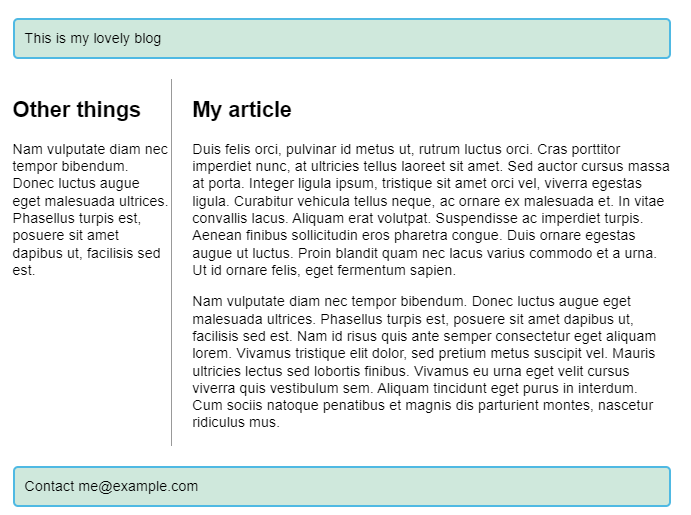


### Positioning with grid-template-areas
* we define marks/labels for each cell in the grid-template-areas in the parent/container, and for each individual HTML element selected by css selector, we assign the grid-area in its css definition
  + each element will expand all the cells with its mark (each element will have only one mark, but each mark can expand multiple cells in grid-template-areas in container)
* the following code will show the same layout as the previous one defined by line-based placement  

```css

    .container {
      display: grid;
      grid-template-areas:
        "header header"
        "sidebar content"
        "footer footer";
      grid-template-columns: 1fr 3fr;
      gap: 20px;
    }

    header {
      grid-area: header;
    }

    article {
      grid-area: content;
    }

    aside {
      grid-area: sidebar;
    }

    footer {
      grid-area: footer;
    }
```

#### Rules for grid-template-areas:
* You need to have every cell of the grid filled.
* To span across two cells, repeat the name.
* To leave a cell empty, use a . (period).
* Areas must be rectangular — for example, you can't have an L-shaped area.
* Areas can't be repeated in different locations.

### Grid frameworks in CSS Grid
* Grid "frameworks" tend to be based around 12 or 16-column grids. With CSS Grid, you don't need any third party tool to give you such a framework — it's already there in the spec

```css
<style>
        body {
            width: 90%;
            max-width: 900px;
            margin: 2em auto;
            font: .9em/1.2 Arial, Helvetica, sans-serif;
        }

        .container {
            display: grid;
            grid-template-columns: repeat(12, minmax(0,1fr));
            gap: 20px;
        }

        header,
        footer {
            border-radius: 5px;
            padding: 10px;
            background-color: rgb(207,232,220);
            border: 2px solid rgb(79,185,227);
        }

        aside {
            border-right: 1px solid #999;
        }

    </style>
    header {
      grid-column: 1 / 13;
      grid-row: 1;
    }

    article {
      grid-column: 4 / 13;
      grid-row: 2;
    }

    aside {
      grid-column: 1 / 4;
      grid-row: 2;
    }

    footer {
      grid-column: 1 / 13;
      grid-row: 3;
    }
  ```


## Flexbox
### Why Flexbox
* Problems of floats and positioning due to the difficulty to achieve the following design in convenient, flexible way:
  + Vertically centering a block of content inside its parent.
  + Making all the children of a container take up an equal amount of the available width/height, regardless of how much width/height is available.
  + Making all columns in a multiple-column layout adopt the same height even if they contain a different amount of content.
  
### Introducing a simple example
* define display: flex of the container/parent element will have multiple-column layout with eqaul-sized columns, and all columns are of the same height
  + the parent element will be treated as a block-level element and its childern are laid out as flex items
  + if you wish to lay out an element's children as flex items, but have that element as an inline element, use inline-flex
  
### The flex model
* The main axis is the axis running in the direction the flex items are laid out in (for example, as a row across the page, or a column down the page.) The start and end of this axis are called the main start and main end
* The corss axis is the axis running perpendicular to the direction the felx items are laid out in. The start and end of this aixs are called the cross start and cross end
* The parent element that has display: flex set on it is called the flex container
* The items laid out as flexible boxes inside the flex container are called flex items
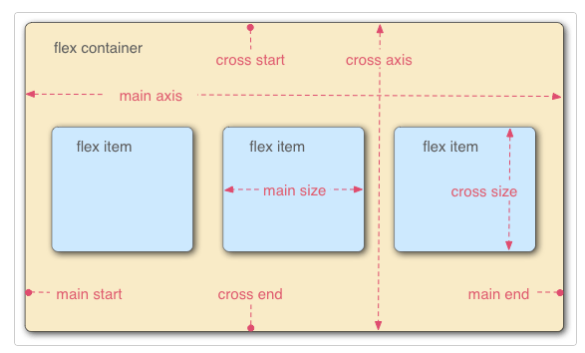
  

In [4]:
%%html
<!DOCTYPE html>
<html lang="en-us">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>Flexbox wrap 0 — children overflowing</title>
    <style>
      html {
        font-family: sans-serif;
      }

      body {
        margin: 0;
      }

      header {
        background: purple;
        height: 100px;
      }

      h1 {
        text-align: center;
        color: white;
        line-height: 100px;
        margin: 0;
      }

      article {
        padding: 10px;
        margin: 10px;
        background: aqua;
      }

      /* Add your flexbox CSS below here */

      section {
        display: flex;
        flex-direction: row;
        /* add flex-wrap to wrap items in container */  
        flex-wrap: wrap;
      }

      article {
          /* define the width of each item as 200px */
          flex: 200px;
        
      }


    </style>
  </head>
  <body>
    <header>
      <h1>Sample flexbox example</h1>
    </header>

    <section>
      <article>
        <h2>First article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Second article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Third article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Fourth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Fifth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Sixth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Seventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eighth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Ninth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Tenth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eleventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Twelfth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>
    </section>
  </body>
</html>

```html
<!DOCTYPE html>
<html lang="en-us">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>Flexbox wrap 0 — children overflowing</title>
    <style>
      html {
        font-family: sans-serif;
      }

      body {
        margin: 0;
      }

      header {
        background: purple;
        height: 100px;
      }

      h1 {
        text-align: center;
        color: white;
        line-height: 100px;
        margin: 0;
      }

      article {
        padding: 10px;
        margin: 10px;
        background: aqua;
      }

      /* Add your flexbox CSS below here */

      section {
        display: flex;
        flex-direction: row;
        // add the flex-wrap in the container to wrap items
        flex-wrap: wrap;
      }

      article {
        // define the min width of each item
          flex: 200px;
        
      }


    </style>
  </head>
  <body>
    <header>
      <h1>Sample flexbox example</h1>
    </header>

    <section>
      <article>
        <h2>First article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Second article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Third article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Fourth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Fifth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Sixth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Seventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eighth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Ninth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Tenth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eleventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Twelfth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>
    </section>
  </body>
</html>
```

### Flexible sizing of flex items
* you can define the relative size of each items in a rwo by flex property
   ```css
        article {
          flex: 1;
        }

        article:nth-of-type(3) {
          flex: 2;
        }    
    ```
    + what happen is that in each row, the width of the items will be assigned based on the relative fractions of flex preoperty
* you can also define the following css:
  ```css
      article {
      flex: 1 200px;
    }

    article:nth-of-type(3) {
      flex: 2 200px;
    }
  ```
  + this defines the following: Each flex item will first be given 200px of the available space. After that, the rest of the available space will be shared according to the proportion units
* The real value of flexbox can be seen in its flexibility/responsiveness 
  + If you resize the browser window or add another article element, the layout continues to work just fine 

In [8]:
%%html
<!DOCTYPE html>
<html lang="en-us">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>Flexbox wrap 0 — children overflowing</title>
    <style>
      html {
        font-family: sans-serif;
      }

      body {
        margin: 0;
      }

      header {
        background: purple;
        height: 100px;
      }

      h1 {
        text-align: center;
        color: white;
        line-height: 100px;
        margin: 0;
      }

      article {
        padding: 10px;
        margin: 10px;
        background: aqua;
      }

      /* Add your flexbox CSS below here */

      section {
        display: flex;
        flex-direction: row;
        /* add flex-wrap to wrap items in container */  
        flex-wrap: wrap;
      }

      article {
  flex: 1 200px;
}

article:nth-of-type(3) {
  flex: 2 200px;
}


    </style>
  </head>
  <body>
    <header>
      <h1>Sample flexbox example</h1>
    </header>

    <section>
      <article>
        <h2>First article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Second article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Third article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Fourth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Fifth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Sixth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Seventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eighth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Ninth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>

      <article>
        <h2>Tenth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Eleventh article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>
      </article>

      <article>
        <h2>Twelfth article</h2>

        <p>Tacos actually microdosing, pour-over semiotics banjo chicharrones retro fanny pack portland everyday carry vinyl typewriter. Tacos PBR&B pork belly, everyday carry ennui pickled sriracha normcore hashtag polaroid single-origin coffee cold-pressed. PBR&B tattooed trust fund twee, leggings salvia iPhone photo booth health goth gastropub hammock.</p>

        <p>Cray food truck brunch, XOXO +1 keffiyeh pickled chambray waistcoat ennui. Organic small batch paleo 8-bit. Intelligentsia umami wayfarers pickled, asymmetrical kombucha letterpress kitsch leggings cold-pressed squid chartreuse put a bird on it. Listicle pickled man bun cornhole heirloom art party.</p>
      </article>
    </section>
  </body>
</html>

### Columns or rows?
* Flexbox provides a property called flex-direction that specifies which direction the main axis runs (which direction the flexbox children are laid out in) 
* By default this is set to row, which causes the items to be laid out in a row
* you can set it to `flex-direction: column`; to arrange the items in column
* you can also set it to `flex-direction: row-reverse` and `flex-direction: column-reverse`

### Wrapping
* One issue that arises when you have a fixed width or height in your layout is that eventually your flexbox children will overflow their container, breaking the layout
  + in the following code, we have 12 articles, if we only define display:flex, then each article will share the width of the contaniner in one row, and each column/article will be very long
  + to solve this issue, we set flex-wrap: wrap in the container (section) so that the article items will be wrapped in the container
  + we also define the flex: 200px so that each item is at least 200px wide  
  + in a row, if there are fewer items, the width of each item will be adjusted to fill the entire row
* flex-flow shorthand
  + you can combine the flex-direction and flex-wrap in flex-flow
  `flex-flow: row wrap;` defines the flex-direction and flex-wrap at the same time

### Horizontal and vertical alignment

In [9]:
%%html
<!DOCTYPE html>
<html lang="en-us">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width">
    <title>Flexbox align 0 — starting code</title>
    <style>
      html {
        font-family: sans-serif;
      }

      body {
        width: 70%;
        max-width: 960px;
        margin: 20px auto;
      }

      button {
        font-size: 18px;
        line-height: 1.5;
        width: 15%;
      }

      div {
        height: 100px;
        border: 1px solid black;
      }

      /* Add your flexbox CSS below here */

      
    </style>
  </head>
  <body>
    <div>
      <button>Smile</button>
      <button>Laugh</button>
      <button>Wink</button>
      <button>Shrug</button>
      <button>Blush</button>
    </div>
  </body>
</html>